In [1]:
import requests
import re
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from urllib.parse import urlencode
import json
from datetime import datetime, timedelta, date
import time

# Helpful site: https://api.inaturalist.org/v1/docs/#!/Observations/get_observations
# look for the taxon ids and place ids in the urls on the web site.

q = {
    "type": "collection",
    "sources": "projects",
    "per_page": 100,
     "page": 1,
}
#url = "https://api.inaturalist.org/v1/projects?q=BioBlitz&type=collection&per_page=30&order_by=created&page="
url = "https://api.inaturalist.org/v1/search?q=Bioblitz"


#del bioblitzProjects
bioblitzProjects = pd.DataFrame()

num_pages = 3

Define functions to retrieve observations, species, identifer and observer counts from iNaturalist

In [2]:
def fetchObservations(projectID):
  time.sleep(3)    
  url = "https://api.inaturalist.org/v1/observations?project_id="
  outputObs = requests.get(url+str(projectID))
  return(outputObs.json()["total_results"])

In [3]:
def fetchSpecies(projectID):
  time.sleep(3)
  url = "https://api.inaturalist.org/v1/observations/species_counts?project_id="
  outputSp = requests.get(url+str(projectID))
  return(outputSp.json()["total_results"])

In [4]:
def fetchIdentifiers(projectID):
  time.sleep(3)
  url = "https://api.inaturalist.org/v1/observations/identifiers?project_id="
  outputIde = requests.get(url+str(projectID))
  return(outputIde.json()["total_results"])

In [5]:
def fetchObservers(projectID):
  time.sleep(3)
  url = "https://api.inaturalist.org/v1/observations/observers?project_id="
  outputObservers = requests.get(url+str(projectID))
  return(outputObservers.json()["total_results"])

In [6]:
def fetchPlace(placeID):
    time.sleep(3)
    url = "https://api.inaturalist.org/v1/places/"
    outputPlace = requests.get(url+str(placeID))
    if outputPlace.json()["total_results"] == 1:
        return(outputPlace.json()["results"][0].get('location'))
    else:
        return 0

In [7]:
def parseDate(dateIn):

        dateOut = datetime.min

        if len(dateIn) == 15:
          dateOut=datetime.strptime(dateIn,'%Y-%m-%d %H:%M')
        elif len(dateIn) == 16:
          if re.search("^[1-2][0-9][0-9][0-9]-[0-9][0-9]-[0-9][0-9]/[0-9][0-9]:[0-9][0-9]$", dateIn): #2020-07-15/11:00
            dateOut=datetime.strptime(dateIn,'%Y-%m-%d/%H:%M')
          elif re.search("^[1-2][0-9][0-9][0-9]-[0-9][0-9]-[0-9][0-9][ ]24:00$", dateIn): #2020-08-16 24:00
            print("Bad end date ", dateIn, len(dateIn), key['field'])
          elif re.search("^[1-2][0-9][0-9][0-9]-[0-9][0-9]-[0-9][0-9]/[0-9][0-9]:[0-9][0-9]$", dateIn): #2020-07-15/11:00
            dateOut=datetime.strptime(dateIn,'%Y-%m-%d/%H:%M')
          else:
            dateOut=datetime.strptime(dateIn,'%Y-%m-%d %H:%M')
        elif len(dateIn) == 19:
          if "M" in dateIn or "m" in dateIn:
            if "/" in dateIn:
              dateOut=datetime.strptime(dateIn,'%Y-%m-%d/%I:%M %p')
            else:
              dateOut=datetime.strptime(dateIn,'%Y-%m-%d %I:%M %p')
          else:
            dateOut=datetime.strptime(dateIn,'%Y-%m-%d %H:%M:%S')
        elif len(dateIn) == 10:
          if "/" in dateIn:
            if re.search("^[1-2][0-9][0-9][0-9]\/[0-9][0-9]\/[0-9][0-9]$", dateIn):
              dateOut=datetime.strptime(dateIn,'%Y/%m/%d')
            else:
              dateOut=datetime.strptime(dateIn,'%d/%m/%Y')
          else:
            dateOut=datetime.strptime(dateIn,'%Y-%m-%d')
        elif len(dateIn) == 23:
          if "M" not in dateIn:
            dayTime = dateIn[0:16].strip()
            dateOut=datetime.strptime(dayTime,'%Y-%m-%d %H:%M')
          else:
            print("Bad end date ", dateIn, len(dateIn), key['field'])
        elif len(dateIn) == 25:
          if "T" in dateIn:
            dayTime = dateIn[0:16]
            dateOut=datetime.strptime(dayTime,'%Y-%m-%dT%H:%M') #2014-03-28T00:00
          else:
            dayTime = dateIn[0:16]
            dateOut=datetime.strptime(dayTime,'%Y-%m-%d %H:%M')
        else:
          print("Bad start date ", dateIn, len(dateIn), key['field'])
        return dateOut



In [8]:
# get all the project from iNaturalist

page = int(1)
while True:
    r = requests.get(url, params=q)
    bioblitzProjects = pd.concat([bioblitzProjects, pd.DataFrame(r.json()["results"])], sort=False)

    #if r.json()["results"] == []:
    #    print("no more results, stopping")
    #    break
    if page > num_pages:
      break
    if page == 1:
        num_pages = int(r.json()["total_results"] / r.json()["per_page"])+1
        print(r.json()["total_results"])
        print(num_pages)
        print("Results:", r.json()["total_results"], ", ", num_pages, " pages total")
    print("Retrieving page ", url+" page " + str(page))
    page += 1
    q["page"] = page
    time.sleep(1)

5804
59
Results: 5804 ,  59  pages total
Retrieving page  https://api.inaturalist.org/v1/search?q=Bioblitz page 1
Retrieving page  https://api.inaturalist.org/v1/search?q=Bioblitz page 2
Retrieving page  https://api.inaturalist.org/v1/search?q=Bioblitz page 3
Retrieving page  https://api.inaturalist.org/v1/search?q=Bioblitz page 4
Retrieving page  https://api.inaturalist.org/v1/search?q=Bioblitz page 5
Retrieving page  https://api.inaturalist.org/v1/search?q=Bioblitz page 6
Retrieving page  https://api.inaturalist.org/v1/search?q=Bioblitz page 7
Retrieving page  https://api.inaturalist.org/v1/search?q=Bioblitz page 8
Retrieving page  https://api.inaturalist.org/v1/search?q=Bioblitz page 9
Retrieving page  https://api.inaturalist.org/v1/search?q=Bioblitz page 10
Retrieving page  https://api.inaturalist.org/v1/search?q=Bioblitz page 11
Retrieving page  https://api.inaturalist.org/v1/search?q=Bioblitz page 12
Retrieving page  https://api.inaturalist.org/v1/search?q=Bioblitz page 13
Retrie

In [12]:
projects =  bioblitzProjects["record"]

In [13]:
count = 0
beginning = datetime.min
ending = datetime.min
lastdate = datetime.now()

year = 2020

#The start and end dates are in all sorts of formats, probably related to the locale of the computer where they were created.
#This means they all have to be parsed. Some have just one data and other none at all.
#Projects with no dates will be dropped.
#The projects with dates that cannot be parsed will be printed out.

projectDetails = pd.DataFrame(columns=['projectID','createdAt','slug', 'placeID','rulePreferences', 'project_type', 'observationRule', 'searchParameters', 'start', 'end', 'duration', 'hours', 'observations', 'identifiers', 'observers', 'species', 'isUmbrella', 'description', 'location'])

for index, value in projects.items():
    print("Project ID ",value['id'])
    print("Slug ",value['slug'])
    beginning = datetime.min
    ending = datetime.min
    count += 1
    if count > 5600: #just for debugging to restrict the time it takes
      break
    for key in value['search_parameters']:
      if key['field'] == 'd1':
        beginning = parseDate(key['value'])
        print("d1 ",key['value'])
      elif key['field'] == 'd2':
        ending = parseDate(key['value'])
        print("d2 ",key['value'])
    print("ending ",ending)
    print("beginning ",beginning)
    print("diff - ",ending-beginning)
    if((ending-beginning) < timedelta(days = 10) and ending < lastdate) and isinstance(value['place_id'], int) and ending > beginning and ending.year == year:
      dfTemp = pd.DataFrame({"projectID":[value['id']], "createdAt":[value['created_at']], "searchParameters":[value['search_parameters']], "start":[beginning], "end":[ending], "duration":[ending-beginning], "hours":[(((ending-beginning).days)*24) + (((ending-beginning).seconds)/3600)],
                            "slug":[value['slug']], "placeID":[value['place_id']], "rulePreferences":[value['rule_preferences']], "project_type":[value['project_type']],
                            "observationRule":[value['project_observation_rules']], "isUmbrella":[value['is_umbrella']], "description":[value['description']], "location":fetchPlace(value['place_id']),
                            'observations':fetchObservations(value['id']), 'identifiers':fetchIdentifiers(value['id']), 'observers':fetchObservers(value['id']), 'species':fetchSpecies(value['id'])})
      projectDetails = projectDetails.append(dfTemp, ignore_index=True)
      print(count, " - ", value['slug'], " ", ending-beginning, ", ", ((ending-beginning).seconds)/3600, ", ", value['place_id'], ", ",ending.year)
      time.sleep(10)
    print("Count = ", count)

Project ID  10802
Slug  personal-bioblitz-spring-2017
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  1
Project ID  12302
Slug  virtual-bioblitz-virtuel
Bad start date  2017-05-22T12:00:00.000-04:00 29 d1
d1  2017-05-22T12:00:00.000-04:00
Bad start date  2017-10-31T12:00:00.000-04:00 29 d2
d2  2017-10-31T12:00:00.000-04:00
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  2
Project ID  3438
Slug  personal-bioblitz-spring-2015
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  3
Project ID  13
Slug  global-amphibian-bioblitz
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  4
Project ID  65853
Slug  personal-bioblitz-spring-2020
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  5
Project ID  6810
Slug  2016-national-parks-bioblitz-nps-servicewide
d1  2016-01-01
d2  2016-12-31
ending  2016-12-31 00:00:00
beginning  2016

d2  2014-09-27T14:00:00.000-07:00
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  152
Project ID  6425
Slug  bioblitz-oxy-2016
d1  2016-03-27
d2  2016-04-03
ending  2016-04-03 00:00:00
beginning  2016-03-27 00:00:00
diff -  7 days, 0:00:00
Count =  153
Project ID  17073
Slug  bioblitz-zealandia-and-birdwood-reserve-wellington-2018
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  154
Project ID  16959
Slug  2018-balboa-park-bioblitz
Bad start date  2018-04-27T14:00:00.000-07:00 29 d1
d1  2018-04-27T14:00:00.000-07:00
Bad start date  2018-04-28T13:59:59.000-07:00 29 d2
d2  2018-04-28T13:59:59.000-07:00
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  155
Project ID  7170
Slug  2016-national-parks-bioblitz-sleeping-bear-dunes
d1  2016-09-16
d2  2016-09-17
ending  2016-09-17 00:00:00
beginning  2016-09-16 00:00:00
diff -  1 day, 0:00:00
Count =  156
Project ID  11592
Slug  lyme-hill-bi

diff -  48 days, 0:00:00
Count =  261
Project ID  22668
Slug  dna-barcoding-bioblitz-at-hidden-villa
Bad start date  2018-06-12T00:00:00.000-07:00 29 d1
d1  2018-06-12T00:00:00.000-07:00
Bad start date  2018-06-19T23:00:00.000-07:00 29 d2
d2  2018-06-19T23:00:00.000-07:00
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  262
Project ID  5321
Slug  stonehill-college-2015-bioblitz
Bad start date  2015-10-04T00:00:00.000-04:00 29 d1
d1  2015-10-04T00:00:00.000-04:00
Bad start date  2015-10-04T23:59:59.000-04:00 29 d2
d2  2015-10-04T23:59:59.000-04:00
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  263
Project ID  11576
Slug  ucsc-fort-ord-natural-reserve-spring-2017-bioblitz
d1  2017-05-06
d2  2017-05-06
ending  2017-05-06 00:00:00
beginning  2017-05-06 00:00:00
diff -  0:00:00
Count =  264
Project ID  2736
Slug  mimosa-rocks-national-park-bioblitz-2014
Bad start date  2014-11-05T14:00:00.000+00:00 29 d1
d1  2014-11-05T

Bad start date  2017-03-25T06:00:00.000-04:00 29 d1
d1  2017-03-25T06:00:00.000-04:00
Bad start date  2017-03-25T23:59:00.000-04:00 29 d2
d2  2017-03-25T23:59:00.000-04:00
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  395
Project ID  23930
Slug  charlie-w-painter-bioblitz-2018
d1  2018-07-27
d2  2018-08-12
ending  2018-08-12 00:00:00
beginning  2018-07-27 00:00:00
diff -  16 days, 0:00:00
Count =  396
Project ID  23317
Slug  bioblitz-biomuseo-jun-18
Bad start date  2018-06-23T07:00:00.000-05:00 29 d1
d1  2018-06-23T07:00:00.000-05:00
Bad start date  2018-06-23T15:00:00.000-05:00 29 d2
d2  2018-06-23T15:00:00.000-05:00
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  397
Project ID  5805
Slug  bioblitz-at-monie-bay-2016
Bad start date  2016-05-12T12:00:00.000-04:00 29 d1
d1  2016-05-12T12:00:00.000-04:00
Bad start date  2016-06-30T12:00:00.000-04:00 29 d2
d2  2016-06-30T12:00:00.000-04:00
ending  0001-01-01 00:00:0

Bad start date  2018-03-24T12:00:00.000-07:00 29 d1
d1  2018-03-24T12:00:00.000-07:00
Bad start date  2018-03-24T14:10:00.000-07:00 29 d2
d2  2018-03-24T14:10:00.000-07:00
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  528
Project ID  6431
Slug  pink-beds-bioblitz
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  529
Project ID  7688
Slug  waters-school-bioblitz-2016
Bad start date  2016-06-08T08:00:00.000-05:00 29 d1
d1  2016-06-08T08:00:00.000-05:00
Bad start date  2016-06-12T10:00:00.000-05:00 29 d2
d2  2016-06-12T10:00:00.000-05:00
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  530
Project ID  3767
Slug  natgeo-gnp-global-snapshot
Bad start date  2015-05-14T08:00:00.000-04:00 29 d1
d1  2015-05-14T08:00:00.000-04:00
Bad start date  2015-05-25T07:59:59.000-04:00 29 d2
d2  2015-05-25T07:59:59.000-04:00
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Co

Slug  mexico-global-snapshot-of-biodiversity-2015
d1  2015-05-15
d2  2015-05-25
ending  2015-05-25 00:00:00
beginning  2015-05-15 00:00:00
diff -  10 days, 0:00:00
Count =  662
Project ID  5029
Slug  2015-cibolo-nature-center-farm-bioblitz
d1  2015-10-05
d2  2015-10-10
ending  2015-10-10 00:00:00
beginning  2015-10-05 00:00:00
diff -  5 days, 0:00:00
Count =  663
Project ID  8990
Slug  rushton-bioblitz-september-2016
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  664
Project ID  10520
Slug  younger-lagoon-reserve-bioblitz-2017
d1  2017-04-29
d2  2017-04-29
ending  2017-04-29 00:00:00
beginning  2017-04-29 00:00:00
diff -  0:00:00
Count =  665
Project ID  26516
Slug  chadron-state-park-bioblitz-2018
d1  2018-09-14
d2  2018-09-15
ending  2018-09-15 00:00:00
beginning  2018-09-14 00:00:00
diff -  1 day, 0:00:00
Count =  666
Project ID  4687
Slug  tva-white-s-creek-tn-bioblitz
d1  2015-07-11
d2  2015-07-11
ending  2015-07-11 00:00:00
beginning  2015-07-

ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  800
Project ID  48422
Slug  hampton-town-forest-bioblitz
d1  2019-09-13
d2  2019-09-16
ending  2019-09-16 00:00:00
beginning  2019-09-13 00:00:00
diff -  3 days, 0:00:00
Count =  801
Project ID  27790
Slug  bombers-bioblitz
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  802
Project ID  9286
Slug  ntu-invertebrate-bioblitz-take-2
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  803
Project ID  32241
Slug  2019-huddart-county-park-spring-bioblitz
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  804
Project ID  11777
Slug  ucla-bioblitz-2017-city-nature-challenge
Bad start date  2017-04-14T08:00:00.000-07:00 29 d1
d1  2017-04-14T08:00:00.000-07:00
Bad start date  2017-04-16T08:00:00.000-07:00 29 d2
d2  2017-04-16T08:00:00.000-07:00
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:0

Count =  937
Project ID  13954
Slug  bay-nature-staff-bioblitz-of-codornices-creek
Bad start date  2017-08-08T00:00:00.000-07:00 29 d1
d1  2017-08-08T00:00:00.000-07:00
Bad start date  2017-08-12T00:00:00.000-07:00 29 d2
d2  2017-08-12T00:00:00.000-07:00
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  938
Project ID  22766
Slug  patuxent-savannah-bioblitz-2018
d1  2018-06-15
d2  2018-06-16
ending  2018-06-16 00:00:00
beginning  2018-06-15 00:00:00
diff -  1 day, 0:00:00
Count =  939
Project ID  18462
Slug  unofficial-bioblitz-june-9-10-2018
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  940
Project ID  9322
Slug  university-of-west-florida-virtual-bioblitz-fall-2016
Bad start date  2016-10-16T12:00:00.000Z 24 d1
d1  2016-10-16T12:00:00.000Z
Bad start date  2016-10-24T12:00:00.000Z 24 d2
d2  2016-10-24T12:00:00.000Z
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  941
Project ID  

Slug  one-tam-french-ranch-bioblitz
Bad start date  2017-05-20T09:00:00.000-07:00 29 d1
d1  2017-05-20T09:00:00.000-07:00
Bad start date  2017-05-20T13:00:00.000-07:00 29 d2
d2  2017-05-20T13:00:00.000-07:00
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  1072
Project ID  4294
Slug  piedmont-wildlife-center-s-bioblitz-2016
Bad start date  2016-04-22T16:00:00.000-04:00 29 d1
d1  2016-04-22T16:00:00.000-04:00
Bad start date  2016-04-23T16:00:00.000-04:00 29 d2
d2  2016-04-23T16:00:00.000-04:00
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  1073
Project ID  16327
Slug  city-nature-challenge-2018-pittsburgh
d1  2018-04-27
d2  2018-04-30
ending  2018-04-30 00:00:00
beginning  2018-04-27 00:00:00
diff -  3 days, 0:00:00
Count =  1074
Project ID  11673
Slug  nature-museum-brush-creek-bioblitz
Bad start date  2017-04-08T05:00:00.000-05:00 29 d1
d1  2017-04-08T05:00:00.000-05:00
Bad start date  2017-04-09T04:59:59.000-05:0

Bad start date  2016-09-16T18:00:00.000-04:00 29 d1
d1  2016-09-16T18:00:00.000-04:00
Bad start date  2016-09-17T15:00:00.000-04:00 29 d2
d2  2016-09-17T15:00:00.000-04:00
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  1212
Project ID  15197
Slug  2017-for-mar-bioblitz
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  1213
Project ID  16431
Slug  nhmla-bioblitz-ocean-institute-docks-2017
Bad start date  2017-11-18T09:00:00.000-08:00 29 d1
d1  2017-11-18T09:00:00.000-08:00
Bad start date  2017-11-18T13:00:00.000-08:00 29 d2
d2  2017-11-18T13:00:00.000-08:00
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  1214
Project ID  21366
Slug  bioblitz-at-the-genesee-county-park-forest
Bad start date  2018-05-18T10:48:00.000-04:00 29 d1
d1  2018-05-18T10:48:00.000-04:00
Bad start date  2018-05-20T16:00:00.000-04:00 29 d2
d2  2018-05-20T16:00:00.000-04:00
ending  0001-01-01 00:00:00
beginning 

d2  2018-11-03T23:59:00.000-04:00
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  1364
Project ID  22619
Slug  snapshot-cal-coast-2018-gazos-creek-beach-bioblitz
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  1365
Project ID  22147
Slug  boone-cliffs-bioblitz
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  1366
Project ID  5861
Slug  bioblitz-of-the-americas-buenos-aires-argentina-2016
Bad start date  2016-01-16T04:00:00.000-08:00 29 d1
d1  2016-01-16T04:00:00.000-08:00
Bad start date  2016-01-17T18:00:00.000-08:00 29 d2
d2  2016-01-17T18:00:00.000-08:00
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  1367
Project ID  41954
Slug  roan-highlands-bioblitz
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  1368
Project ID  7863
Slug  2016-macaulay-honors-college-brooklyn-bridge-park-bioblitz
Bad start date  2016-0

Project ID  24306
Slug  saskatchewan-parks-2018-virtual-bioblitz
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  1518
Project ID  6853
Slug  2016-national-parks-bioblitz-glacier-lake-ecology-blitz
d1  2016-05-25
d2  2016-05-28
ending  2016-05-28 00:00:00
beginning  2016-05-25 00:00:00
diff -  3 days, 0:00:00
Count =  1519
Project ID  28290
Slug  ulm-bioblitz-fall-2018
d1  2018-10-05
d2  2018-10-06
ending  2018-10-06 00:00:00
beginning  2018-10-05 00:00:00
diff -  1 day, 0:00:00
Count =  1520
Project ID  45698
Slug  summer-plaster-reservoir-metzger-farm-bioblitz-2019
d1  2019-07-19
d2  2019-07-20
ending  2019-07-20 00:00:00
beginning  2019-07-19 00:00:00
diff -  1 day, 0:00:00
Count =  1521
Project ID  6980
Slug  2016-national-parks-bioblitz-theodore-roosevelt
d1  2016-06-24
d2  2016-06-25
ending  2016-06-25 00:00:00
beginning  2016-06-24 00:00:00
diff -  1 day, 0:00:00
Count =  1522
Project ID  27318
Slug  bioblitz-simarsul-setubal-observanatura-2018

ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  1586
Project ID  43737
Slug  richmond-national-battlefield-park-bioblitz-2019
d1  2019-05-31
d2  2019-06-08
ending  2019-06-08 00:00:00
beginning  2019-05-31 00:00:00
diff -  8 days, 0:00:00
Count =  1587
Project ID  18885
Slug  palo-duro-canyon-state-park-spring-2018-bioblitz
Bad start date  2018-03-31T11:00:00.000-05:00 29 d1
d1  2018-03-31T11:00:00.000-05:00
Bad start date  2018-03-31T20:00:00.000-05:00 29 d2
d2  2018-03-31T20:00:00.000-05:00
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  1588
Project ID  7601
Slug  fort-circle-parks-washington-dc
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  1589
Project ID  17071
Slug  crystal-cove-winter-intertidal-bioblitz-2018
Bad start date  2018-01-13T13:00:00.000-08:00 29 d1
d1  2018-01-13T13:00:00.000-08:00
Bad start date  2018-01-13T17:00:00.000-08:00 29 d2
d2  2018-01-13T17:00:00.00

Slug  bnc-bioblitz-stunt-ranch
Bad start date  2015-11-07T06:00:00.000-10:00 29 d1
d1  2015-11-07T06:00:00.000-10:00
Bad start date  2015-11-08T06:00:00.000-10:00 29 d2
d2  2015-11-08T06:00:00.000-10:00
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  1710
Project ID  11066
Slug  skaneateles-conservation-area-3d8a1fcb-c473-478b-a958-c8deb95c173e
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  1711
Project ID  26268
Slug  guilford-college-bio-blitz
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  1712
Project ID  30689
Slug  bioblitz-institucion-educativa-los-limones-752c89f1-1e96-4886-a301-ecaf3fd81503
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  1713
Project ID  27890
Slug  ma-le-l-dunes-bioblitz
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  1714
Project ID  13822
Slug  2017-student-and-family-bioblitz
Ba

1800  -  enst-495-2020-catalina-plants   1 day, 0:00:00 ,  0.0 ,  121232 ,  2020
Count =  1800
Project ID  29624
Slug  city-nature-challenge-2019-san-francisco-bay-area
d1  2019-04-26
d2  2019-04-29
ending  2019-04-29 00:00:00
beginning  2019-04-26 00:00:00
diff -  3 days, 0:00:00
Count =  1801
Project ID  8536
Slug  velocity-practice-bioblitz
d1  2016-08-09
d2  2016-08-16
ending  2016-08-16 00:00:00
beginning  2016-08-09 00:00:00
diff -  7 days, 0:00:00
Count =  1802
Project ID  14693
Slug  burr-and-burton-academy-bioblitz-2017
d1  2017-09-09
d2  2017-11-08
ending  2017-11-08 00:00:00
beginning  2017-09-09 00:00:00
diff -  60 days, 0:00:00
Count =  1803
Project ID  21249
Slug  nolin-lake-state-park-bioblitz
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  1804
Project ID  3665
Slug  havo-bioblitz-workshop-feb-28-2015
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  1805
Project ID  21216
Slug  snapshot-cal-coast-201

beginning  2018-07-15 00:00:00
diff -  6 days, 0:00:00
Count =  1927
Project ID  12525
Slug  bioblitz-trentino-a-lamar
Bad start date  2017-05-20T20:00:00.000+02:00 29 d1
d1  2017-05-20T20:00:00.000+02:00
Bad start date  2017-06-04T23:00:00.000+02:00 29 d2
d2  2017-06-04T23:00:00.000+02:00
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  1928
Project ID  7614
Slug  parco-orobie-valtellinesi-bioblitz
Bad start date  2016-05-20T12:00:00.000-10:00 29 d1
d1  2016-05-20T12:00:00.000-10:00
Bad start date  2016-05-22T12:00:00.000-10:00 29 d2
d2  2016-05-22T12:00:00.000-10:00
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  1929
Project ID  34898
Slug  osa-peninsula-bioblitz-2019
Bad start date  2019-02-17T00:00:00.000-06:00 29 d1
d1  2019-02-17T00:00:00.000-06:00
Bad start date  2019-03-03T00:00:00.000-06:00 29 d2
d2  2019-03-03T00:00:00.000-06:00
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Co

Slug  rmbl-butterfly-bioblitz
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  2064
Project ID  9383
Slug  surry-community-college-fall-bioblitz-test
Bad start date  2016-10-05T12:00:00.000-04:00 29 d1
d1  2016-10-05T12:00:00.000-04:00
Bad start date  2016-10-06T12:00:00.000-04:00 29 d2
d2  2016-10-06T12:00:00.000-04:00
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  2065
Project ID  47044
Slug  bioparamoblitz-ngs-2019
d1  2019-10-12
d2  2019-10-30
ending  2019-10-30 00:00:00
beginning  2019-10-12 00:00:00
diff -  18 days, 0:00:00
Count =  2066
Project ID  7439
Slug  yty-liberty-park-training
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  2067
Project ID  7053
Slug  wildlife-hunt-at-nhm
Bad start date  2016-04-16T09:30:00.000-07:00 29 d1
d1  2016-04-16T09:30:00.000-07:00
Bad start date  2016-04-16T13:00:00.000-07:00 29 d2
d2  2016-04-16T13:00:00.000-07:00
ending  0001-01-01 00:00

d2  2018-05-06T18:00:00.000-05:00
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  2207
Project ID  28978
Slug  diablo-foothills-first-bioblitz
Bad start date  2018-10-20T06:00:00.000-07:00 29 d1
d1  2018-10-20T06:00:00.000-07:00
Bad start date  2018-10-28T21:33:00.000-07:00 29 d2
d2  2018-10-28T21:33:00.000-07:00
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  2208
Project ID  26068
Slug  bonham-inaturalist-training-fall-2018-bioblitz
Bad start date  2018-09-08T11:00:00.000-05:00 29 d1
d1  2018-09-08T11:00:00.000-05:00
Bad start date  2018-09-08T18:00:00.000-05:00 29 d2
d2  2018-09-08T18:00:00.000-05:00
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  2209
Project ID  18592
Slug  2018-virtual-bioblitz-sk-landing-provincial-park
d1  2018-07-15
d2  2018-07-21
ending  2018-07-21 00:00:00
beginning  2018-07-15 00:00:00
diff -  6 days, 0:00:00
Count =  2210
Project ID  40199
Slug  2019

2280  -  border-bioblitz-2020-reto-naturalista-urbano-tijuana-2020   3 days, 0:00:00 ,  0.0 ,  101524 ,  2020
Count =  2280
Project ID  66737
Slug  leap-year-bioblitz-at-laguna-seca
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  2281
Project ID  66811
Slug  foothill-regional-park-bioblitz-2020
Bad start date  2020-04-26T00:00:00.000-07:00 29 d1
d1  2020-04-26T00:00:00.000-07:00
Bad start date  2020-04-26T00:00:00.000-07:00 29 d2
d2  2020-04-26T00:00:00.000-07:00
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  2282
Project ID  66813
Slug  sonoma-valley-regional-park-bioblitz-2020
Bad start date  2020-04-27T00:00:00.000-07:00 29 d1
d1  2020-04-27T00:00:00.000-07:00
Bad start date  2020-04-27T12:00:00.000-07:00 29 d2
d2  2020-04-27T12:00:00.000-07:00
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  2283
Project ID  66860
Slug  lincoln-trail-homestead-state-park-mini-bioblitz-july
en

2321  -  fraser-coast-backyard-bioblitz-no-2   1 day, 0:00:00 ,  0.0 ,  140461 ,  2020
Count =  2321
Project ID  76344
Slug  awa-bioblitz-2020-inukshuk
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  2322
Project ID  76686
Slug  yukon-backyard-bioblitz-2020-mt-lorne
d1  2020-06-01
d2  2020-08-31
ending  2020-08-31 00:00:00
beginning  2020-06-01 00:00:00
diff -  91 days, 0:00:00
Count =  2323
Project ID  76687
Slug  yukon-backyard-bioblitz-2020-marsh-lake
d1  2020-06-01
d2  2020-08-31
ending  2020-08-31 00:00:00
beginning  2020-06-01 00:00:00
diff -  91 days, 0:00:00
Count =  2324
Project ID  76697
Slug  yukon-backyard-bioblitz-2020-mayo-and-stewart-crossing
d1  2020-06-01
d2  2020-08-31
ending  2020-08-31 00:00:00
beginning  2020-06-01 00:00:00
diff -  91 days, 0:00:00
Count =  2325
Project ID  76698
Slug  yukon-backyard-bioblitz-2020-pelly-crossing-and-carmacks
d1  2020-06-01
d2  2020-08-31
ending  2020-08-31 00:00:00
beginning  2020-06-01 00:00:00


2365  -  houston-birding-bioblitz-2020   1 day, 0:00:00 ,  0.0 ,  126407 ,  2020
Count =  2365
Project ID  22721
Slug  biology-of-butterflies-2018-bioblitz
Bad start date  2018-06-06T16:07:00.000+05:30 29 d1
d1  2018-06-06T16:07:00.000+05:30
Bad start date  2018-06-25T16:07:00.000+05:30 29 d2
d2  2018-06-25T16:07:00.000+05:30
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  2366
Project ID  70699
Slug  del-oro-bioblitz-spring-2020
Bad start date  2020-04-14T12:13:00.000-07:00 29 d1
d1  2020-04-14T12:13:00.000-07:00
Bad start date  2020-04-21T10:40:00.000-07:00 29 d2
d2  2020-04-21T10:40:00.000-07:00
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  2367
Project ID  73034
Slug  need-2020-spring-bioblitz
Bad start date  2020-04-25T10:58:00.000-04:00 29 d1
d1  2020-04-25T10:58:00.000-04:00
Bad start date  2020-06-15T10:51:00.000-04:00 29 d2
d2  2020-06-15T10:51:00.000-04:00
ending  0001-01-01 00:00:00
beginning  0001-01-

beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  2504
Project ID  16049
Slug  morris-p-8-bioblitz
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  2505
Project ID  16050
Slug  danville-middle-school-bioblitz-identification-challenge-in-the-outdoor-classroom
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  2506
Project ID  16061
Slug  legacy-elem-bioblitz
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  2507
Project ID  16233
Slug  tsta-bioblitz
Bad start date  2017-11-09T12:00:00.000Z 24 d1
d1  2017-11-09T12:00:00.000Z
Bad start date  2017-11-10T12:00:00.000Z 24 d2
d2  2017-11-10T12:00:00.000Z
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  2508
Project ID  16253
Slug  john-p-powell-bioblitz
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  2509
Project ID  16254
Slug  radney-elementary-bioblitz
Bad start d

Bad start date  2019-02-16T08:00:00.000-05:00 29 d1
d1  2019-02-16T08:00:00.000-05:00
Bad start date  2019-02-16T11:00:00.000-05:00 29 d2
d2  2019-02-16T11:00:00.000-05:00
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  2650
Project ID  34441
Slug  test-run-for-bioblitz
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  2651
Project ID  34448
Slug  march-2019-south-mountain-bioblitz
Bad start date  2019-03-09T08:00:00.000-08:00 29 d1
d1  2019-03-09T08:00:00.000-08:00
Bad start date  2019-03-09T12:00:00.000-08:00 29 d2
d2  2019-03-09T12:00:00.000-08:00
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  2652
Project ID  34612
Slug  summerseat-sanctuary
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  2653
Project ID  34894
Slug  imperial-msc-2019-bioblitz-at-kew-gardens
Bad start date  2019-02-21T14:58:00.000+00:00 29 d1
d1  2019-02-21T14:58:00.000+00:0

beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  2797
Project ID  41357
Slug  enders-reservoir-bioblitz
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  2798
Project ID  41377
Slug  brooklyn-bridge-park-bioblitz
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  2799
Project ID  41378
Slug  colonial-national-historic-park-bioblitz
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  2800
Project ID  41382
Slug  gateway-national-recreation-area-sandy-hook-bioblitz
Bad start date  2016-10-23T17:26:00.000-04:00 29 d1
d1  2016-10-23T17:26:00.000-04:00
Bad start date  2016-10-24T17:26:00.000-04:00 29 d2
d2  2016-10-24T17:26:00.000-04:00
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  2801
Project ID  42012
Slug  forest-holidays-bioblitz
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  2802
Project ID  42044
Slug  201

Bad start date  2019-08-28T12:26:00.000-06:00 29 d2
d2  2019-08-28T12:26:00.000-06:00
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  2945
Project ID  49331
Slug  bioblitz-billund-ravnhoj-hede
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  2946
Project ID  49502
Slug  bioblitz-20-years-of-the-riparian-preserve
Bad start date  2019-10-12T09:00:00.000-07:00 29 d1
d1  2019-10-12T09:00:00.000-07:00
Bad start date  2019-10-12T12:00:00.000-07:00 29 d2
d2  2019-10-12T12:00:00.000-07:00
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  2947
Project ID  49686
Slug  sanborn-park-bioblitz-ysi
Bad start date  2019-09-08T09:00:00.000-07:00 29 d1
d1  2019-09-08T09:00:00.000-07:00
Bad start date  2019-09-08T03:30:00.000-07:00 29 d2
d2  2019-09-08T03:30:00.000-07:00
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  2948
Project ID  49737
Slug  chickstock-bioblitz

beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  3092
Project ID  65264
Slug  sierra-outdoor-school-bioblitz-2020
Bad start date  2020-05-09T06:00:00.000-07:00 29 d1
d1  2020-05-09T06:00:00.000-07:00
Bad start date  2020-05-09T13:00:00.000-07:00 29 d2
d2  2020-05-09T13:00:00.000-07:00
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  3093
Project ID  64544
Slug  world-wetlands-day-2020-bermuda-bioblitz
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  3094
Project ID  61192
Slug  ocean-sanctuaries-king-tide-bioblitz-feb-2020
Bad start date  2020-02-08T01:00:00.000-08:00 29 d1
d1  2020-02-08T01:00:00.000-08:00
Bad start date  2020-02-10T20:00:00.000-08:00 29 d2
d2  2020-02-10T20:00:00.000-08:00
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  3095
Project ID  65246
Slug  bioblitz-at-grandfather-mtn-stewardship-foundation-park
Bad start date  2020-06-20T07:30:00.000-04:00 29 d1
d

3129  -  backyard-bioblitz-little-mulberry-park   1 day, 0:00:00 ,  0.0 ,  143950 ,  2020
Count =  3129
Project ID  13035
Slug  parks-canada-bioblitz-2017-churchill
d1  2017-06-24
d2  2017-09-01
ending  2017-09-01 00:00:00
beginning  2017-06-24 00:00:00
diff -  69 days, 0:00:00
Count =  3130
Project ID  48008
Slug  bioblitz-2019-de-parcs-canada-saguenay-saint-laurent
Bad start date  2019-08-10T13:00:00.000-07:00 29 d1
d1  2019-08-10T13:00:00.000-07:00
Bad start date  2019-08-10T16:00:00.000-07:00 29 d2
d2  2019-08-10T16:00:00.000-07:00
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  3131
Project ID  28765
Slug  parks-canada-bioblitz-2018-pukaskwa
d1  2018-08-10
d2  2018-08-11
ending  2018-08-11 00:00:00
beginning  2018-08-10 00:00:00
diff -  1 day, 0:00:00
Count =  3132
Project ID  70482
Slug  garnett-bioblitz
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  3133
Project ID  72461
Slug  enviroed-bioblitz-practice
Ba

3209  -  riverfront-north-city-nature-challenge-bioblitz   3 days, 0:00:00 ,  0.0 ,  131284 ,  2020
Count =  3209
Project ID  72892
Slug  mcpherson-elementary-schools-backyard-bioblitz
d1  2020-04-24
d2  2020-04-26
ending  2020-04-26 00:00:00
beginning  2020-04-24 00:00:00
diff -  2 days, 0:00:00
3210  -  mcpherson-elementary-schools-backyard-bioblitz   2 days, 0:00:00 ,  0.0 ,  446 ,  2020
Count =  3210
Project ID  60405
Slug  soaring-stars-2020-bioblitz
Bad start date  2020-03-14T10:42:00.000-04:00 29 d1
d1  2020-03-14T10:42:00.000-04:00
Bad start date  2020-06-12T10:42:00.000-04:00 29 d2
d2  2020-06-12T10:42:00.000-04:00
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  3211
Project ID  71695
Slug  bioblitz-2020-alma-de-bahia
Bad start date  2020-04-10T16:57:00.000-04:00 29 d1
d1  2020-04-10T16:57:00.000-04:00
Bad start date  2020-05-16T16:57:00.000-04:00 29 d2
d2  2020-05-16T16:57:00.000-04:00
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00

3253  -  weekend-nature-bioblitz-for-rolling-plains-tmn   3 days, 0:00:00 ,  0.0 ,  1208 ,  2020
Count =  3253
Project ID  13035
Slug  parks-canada-bioblitz-2017-churchill
d1  2017-06-24
d2  2017-09-01
ending  2017-09-01 00:00:00
beginning  2017-06-24 00:00:00
diff -  69 days, 0:00:00
Count =  3254
Project ID  28765
Slug  parks-canada-bioblitz-2018-pukaskwa
d1  2018-08-10
d2  2018-08-11
ending  2018-08-11 00:00:00
beginning  2018-08-10 00:00:00
diff -  1 day, 0:00:00
Count =  3255
Project ID  48008
Slug  bioblitz-2019-de-parcs-canada-saguenay-saint-laurent
Bad start date  2019-08-10T13:00:00.000-07:00 29 d1
d1  2019-08-10T13:00:00.000-07:00
Bad start date  2019-08-10T16:00:00.000-07:00 29 d2
d2  2019-08-10T16:00:00.000-07:00
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  3256
Project ID  71877
Slug  geo-138-bioblitz-on-the-quad-2020
Bad start date  2020-04-10T10:48:00.000-05:00 29 d1
d1  2020-04-10T10:48:00.000-05:00
Bad start date  2020-05-01T10:48

Bad start date  2018-06-25T16:07:00.000+05:30 29 d2
d2  2018-06-25T16:07:00.000+05:30
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  3383
Project ID  75232
Slug  houston-birding-bioblitz-2020
d1  2020-05-23
d2  2020-05-24
ending  2020-05-24 00:00:00
beginning  2020-05-23 00:00:00
diff -  1 day, 0:00:00
3384  -  houston-birding-bioblitz-2020   1 day, 0:00:00 ,  0.0 ,  126407 ,  2020
Count =  3384
Project ID  33423
Slug  red-top-mountain-state-park-bioblitz-2019
Bad start date  2019-01-01T09:19:00.000-05:00 29 d1
d1  2019-01-01T09:19:00.000-05:00
Bad start date  2019-12-31T13:52:00.000-05:00 29 d2
d2  2019-12-31T13:52:00.000-05:00
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  3385
Project ID  39228
Slug  wvwc-gen-bio-bioblitz
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  3386
Project ID  76892
Slug  last-weekend-of-may-bioblitz-2020
d1  2020-05-30
d2  2020-05-31
ending  2020-0

3440  -  georgeson-birthday-bash-bioblitz   1 day, 0:00:00 ,  0.0 ,  6 ,  2020
Count =  3440
Project ID  45212
Slug  njsoc-teacher-scholar-bioblitz-2019
Bad start date  2019-06-24T08:00:00.000-07:00 29 d1
d1  2019-06-24T08:00:00.000-07:00
Bad start date  2019-09-17T14:24:00.000-04:00 29 d2
d2  2019-09-17T14:24:00.000-04:00
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  3441
Project ID  7282
Slug  2016-national-parks-bioblitz-caddisflies-of-buffalo-national-river
d1  2016-05-21
d2  2016-05-22
ending  2016-05-22 00:00:00
beginning  2016-05-21 00:00:00
diff -  1 day, 0:00:00
Count =  3442
Project ID  21182
Slug  skunk-creek-bioblitz
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  3443
Project ID  22133
Slug  snapshot-cal-coast-2018-santa-clara-river-estuary-bioblitz
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  3444
Project ID  32376
Slug  psi-bioblitz-denny-c
Bad start date  201

3503  -  cosi-science-festival-bioblitz-2020   3 days, 0:00:00 ,  0.0 ,  31 ,  2020
Count =  3503
Project ID  77466
Slug  gerbrandskolens-bioblitz-med-naturcenter-amager-strand-4-argang
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  3504
Project ID  77467
Slug  gerbrandskolens-bioblitz-med-naturcenter-amager-strand-5-argang
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  3505
Project ID  77468
Slug  gerbrandskolens-bioblitz-med-naturcenter-amager-strand-6-argang
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  3506
Project ID  37326
Slug  bioblitz-bearitage-spring-2019
d1  2019-04-12
d2  2019-04-13
ending  2019-04-13 00:00:00
beginning  2019-04-12 00:00:00
diff -  1 day, 0:00:00
Count =  3507
Project ID  30186
Slug  california-academy-of-sciences-bioblitzes
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  3508
Project ID  51324
Slug  sjsu-eco-to

3544  -  georgeson-birthday-bash-bioblitz   1 day, 0:00:00 ,  0.0 ,  6 ,  2020
Count =  3544
Project ID  78852
Slug  6-25-2020-plum-creek-bioblitz
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  3545
Project ID  72314
Slug  deidra-street-bioblitz-quarantine-edition
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  3546
Project ID  78712
Slug  bringing-on-biodiversity-lily-lake-bioblitz
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  3547
Project ID  78421
Slug  cadagno-airolo-gotthard-bioblitz-june-20-27-2020
d1  2020-06-20
d2  2020-06-27
ending  2020-06-27 00:00:00
beginning  2020-06-20 00:00:00
diff -  7 days, 0:00:00
3548  -  cadagno-airolo-gotthard-bioblitz-june-20-27-2020   7 days, 0:00:00 ,  0.0 ,  12672 ,  2020
Count =  3548
Project ID  78790
Slug  fort-river-watershed-bioblitz-2020
Bad start date  2020-01-01T16:18:00.000-05:00 29 d1
d1  2020-01-01T16:18:00.000-05:00
Bad sta

3588  -  fraser-coast-backyard-bioblitz-no-2   1 day, 0:00:00 ,  0.0 ,  140461 ,  2020
Count =  3588
Project ID  76344
Slug  awa-bioblitz-2020-inukshuk
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  3589
Project ID  76686
Slug  yukon-backyard-bioblitz-2020-mt-lorne
d1  2020-06-01
d2  2020-08-31
ending  2020-08-31 00:00:00
beginning  2020-06-01 00:00:00
diff -  91 days, 0:00:00
Count =  3590
Project ID  76687
Slug  yukon-backyard-bioblitz-2020-marsh-lake
d1  2020-06-01
d2  2020-08-31
ending  2020-08-31 00:00:00
beginning  2020-06-01 00:00:00
diff -  91 days, 0:00:00
Count =  3591
Project ID  76697
Slug  yukon-backyard-bioblitz-2020-mayo-and-stewart-crossing
d1  2020-06-01
d2  2020-08-31
ending  2020-08-31 00:00:00
beginning  2020-06-01 00:00:00
diff -  91 days, 0:00:00
Count =  3592
Project ID  76698
Slug  yukon-backyard-bioblitz-2020-pelly-crossing-and-carmacks
d1  2020-06-01
d2  2020-08-31
ending  2020-08-31 00:00:00
beginning  2020-06-01 00:00:00


3629  -  fraser-coast-backyard-bioblitz-no-3   1 day, 0:00:00 ,  0.0 ,  140461 ,  2020
Count =  3629
Project ID  75323
Slug  uwsp-tws-student-bioblitz
Bad start date  2020-06-01T12:49:00.000-05:00 29 d1
d1  2020-06-01T12:49:00.000-05:00
Bad start date  2020-09-30T12:49:00.000-05:00 29 d2
d2  2020-09-30T12:49:00.000-05:00
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  3630
Project ID  76459
Slug  bioblitz-dia-mundial-del-ambiente-2020-panama-oeste
d1  2020-06-05
d2  2020-06-05
ending  2020-06-05 00:00:00
beginning  2020-06-05 00:00:00
diff -  0:00:00
Count =  3631
Project ID  76455
Slug  roscommon-county-community-bioblitz
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  3632
Project ID  77586
Slug  jcnerr-bioblitz-pt2
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  3633
Project ID  78075
Slug  canada-153-bioblitz-prince-edward-island
ending  0001-01-01 00:00:00
beginning  0001-01

3681  -  hrpk-july-2020-bioblitz   6 days, 0:00:00 ,  0.0 ,  152441 ,  2020
Count =  3681
Project ID  74885
Slug  sask-parks-bioblitz-2020-echo-valley-provincial-park
d1  2020-06-13
d2  2020-09-07
ending  2020-09-07 00:00:00
beginning  2020-06-13 00:00:00
diff -  86 days, 0:00:00
Count =  3682
Project ID  79636
Slug  obcwe-mini-bioblitz
Bad start date  2020-07-07T09:24:00.000-04:00 29 d1
d1  2020-07-07T09:24:00.000-04:00
Bad start date  2020-07-19T22:00:00.000-04:00 29 d2
d2  2020-07-19T22:00:00.000-04:00
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  3683
Project ID  78793
Slug  yukon-wildlife-preserve-2020-bioblitz
Bad start date  2020-07-08T10:30:00.000-07:00 29 d1
d1  2020-07-08T10:30:00.000-07:00
Bad start date  2020-07-10T17:30:00.000-07:00 29 d2
d2  2020-07-10T17:30:00.000-07:00
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  3684
Project ID  80054
Slug  grimmway-academy-esy-bioblitz
ending  0001-01-01 00:0

3720  -  rolling-plains-tmn-moth-and-insect-bioblitz   8 days, 0:00:00 ,  0.0 ,  911 ,  2020
Count =  3720
Project ID  80258
Slug  belle-isle-bioblitz
Bad start date  2020-07-09T10:58:00.000-04:00 29 d1
d1  2020-07-09T10:58:00.000-04:00
Bad start date  2020-08-01T10:58:00.000-04:00 29 d2
d2  2020-08-01T10:58:00.000-04:00
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  3721
Project ID  69030
Slug  llnf-bioblitz-for-nantucket-physical-distancing-in-nature
Bad start date  2020-03-15T20:24:00.000-04:00 29 d1
d1  2020-03-15T20:24:00.000-04:00
Bad start date  2020-05-17T09:24:00.000-04:00 29 d2
d2  2020-05-17T09:24:00.000-04:00
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  3722
Project ID  48584
Slug  nantucket-mma-bioblitz
Bad start date  2019-08-19T07:29:00.000-04:00 29 d1
d1  2019-08-19T07:29:00.000-04:00
Bad start date  2019-08-24T07:29:00.000-04:00 29 d2
d2  2019-08-24T07:29:00.000-04:00
ending  0001-01-01 00:00:0

3781  -  2020-sam-mcdonald-park-bioblitz   1 day, 0:00:00 ,  0.0 ,  3142 ,  2020
Count =  3781
Project ID  82410
Slug  august-2020-kunhm-bioblitz
d1  2020-08-01
d2  2020-08-31
ending  2020-08-31 00:00:00
beginning  2020-08-01 00:00:00
diff -  30 days, 0:00:00
Count =  3782
Project ID  19711
Slug  lake-skader-bioblitz
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  3783
Project ID  75209
Slug  lc-chapter-of-the-wildlife-society-bioblitz
Bad start date  2020-06-01T10:27:00.000-06:00 29 d1
d1  2020-06-01T10:27:00.000-06:00
Bad start date  2020-09-30T10:27:00.000-06:00 29 d2
d2  2020-09-30T10:27:00.000-06:00
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  3784
Project ID  79248
Slug  plant-club-virtual-bioblitz
d1  2020-07-27
d2  2020-08-09
ending  2020-08-09 00:00:00
beginning  2020-07-27 00:00:00
diff -  13 days, 0:00:00
Count =  3785
Project ID  79953
Slug  homested-horizons-bioblitz-2020
Bad start date  2020-07-01T

Count =  3817
Project ID  78023
Slug  how-nature-works-bioblitz-summer-2020
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  3818
Project ID  71598
Slug  madison-county-ohio-summer-bioblitz
Bad start date  2020-05-01T08:56:00.000-04:00 29 d1
d1  2020-05-01T08:56:00.000-04:00
Bad start date  2020-09-01T18:14:00.000-04:00 29 d2
d2  2020-09-01T18:14:00.000-04:00
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  3819
Project ID  84182
Slug  ncc-s-big-backyard-bioblitz-nunavut
d1  2020-08-24
d2  2020-08-30
ending  2020-08-30 00:00:00
beginning  2020-08-24 00:00:00
diff -  6 days, 0:00:00
3820  -  ncc-s-big-backyard-bioblitz-nunavut   6 days, 0:00:00 ,  0.0 ,  13335 ,  2020
Count =  3820
Project ID  84199
Slug  sd-state-fair-bioblitz
d1  2020-09-03
d2  2020-09-07
ending  2020-09-07 00:00:00
beginning  2020-09-03 00:00:00
diff -  4 days, 0:00:00
3821  -  sd-state-fair-bioblitz   4 days, 0:00:00 ,  0.0 ,  1366 ,  2020
Count =

3860  -  ncc-s-big-backyard-bioblitz-nova-scotia   6 days, 0:00:00 ,  0.0 ,  6853 ,  2020
Count =  3860
Project ID  79358
Slug  fpe-2020-joe-orr-woods-crew-bioblitz
d1  2020-07-13
d2  2020-08-10
ending  2020-08-10 00:00:00
beginning  2020-07-13 00:00:00
diff -  28 days, 0:00:00
Count =  3861
Project ID  79353
Slug  fpe-2020-kickapoo-woods-crew-bioblitz
d1  2020-07-13
d2  2020-08-10
ending  2020-08-10 00:00:00
beginning  2020-07-13 00:00:00
diff -  28 days, 0:00:00
Count =  3862
Project ID  83562
Slug  ncc-s-big-backyard-bioblitz
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  3863
Project ID  79361
Slug  fpe-2020-bartel-grassland-crew-bioblitz
d1  2020-07-13
d2  2020-08-10
ending  2020-08-10 00:00:00
beginning  2020-07-13 00:00:00
diff -  28 days, 0:00:00
Count =  3864
Project ID  78323
Slug  fpe-2020-wampum-lake-crew-bioblitz
d1  2020-07-13
d2  2020-08-10
ending  2020-08-10 00:00:00
beginning  2020-07-13 00:00:00
diff -  28 days, 0:00:00
Count =  38

3899  -  99-arter---bioblitz   3 days, 0:00:00 ,  0.0 ,  8051 ,  2020
Count =  3899
Project ID  74720
Slug  warren-county-nature-bioblitz
d1  2020-05-25
d2  2020-09-07
ending  2020-09-07 00:00:00
beginning  2020-05-25 00:00:00
diff -  105 days, 0:00:00
Count =  3900
Project ID  7124
Slug  chugach-national-forest-bioblitz
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  3901
Project ID  74876
Slug  langley-watershed-bioblitz
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  3902
Project ID  84088
Slug  fw-221-bioblitz-fall-20
Bad start date  2020-08-10T12:41:00.000-04:00 29 d1
d1  2020-08-10T12:41:00.000-04:00
Bad start date  2020-11-20T12:41:00.000-05:00 29 d2
d2  2020-11-20T12:41:00.000-05:00
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  3903
Project ID  85935
Slug  great-southern-bioblitz-2020-stanthorpe-qld-australia
Bad start date  2020-09-25T00:01:00.000+09:30 29 d1
d1  2020-

3935  -  efmn-counties-fall-socially-distant-bioblitz   6 days, 0:00:00 ,  0.0 ,  2436 ,  2020
Count =  3935
Project ID  48989
Slug  loggerhead-marinelife-center-backyard-bioblitz
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  3936
Project ID  44136
Slug  henes-park-blesch-bioblitz
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  3937
Project ID  79520
Slug  hrpk-september-2020-bioblitz
d1  2020-09-09
d2  2020-09-16
ending  2020-09-16 00:00:00
beginning  2020-09-09 00:00:00
diff -  7 days, 0:00:00
3938  -  hrpk-september-2020-bioblitz   7 days, 0:00:00 ,  0.0 ,  152441 ,  2020
Count =  3938
Project ID  86857
Slug  backyard-bioblitz-schools-sept-2020
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  3939
Project ID  70094
Slug  durham-wide-bioblitz-2020
d1  2020-03-30
d2  2020-04-12
ending  2020-04-12 00:00:00
beginning  2020-03-30 00:00:00
diff -  13 days, 0:00:00
Count =  3940
Pro

3975  -  dorr-school-bioblitz   2 days, 0:00:00 ,  0.0 ,  159868 ,  2020
Count =  3975
Project ID  84139
Slug  ca-biodiversity-day-2020-mt-davidson-bioblitz
d1  2020-09-05
d2  2020-09-13
ending  2020-09-13 00:00:00
beginning  2020-09-05 00:00:00
diff -  8 days, 0:00:00
3976  -  ca-biodiversity-day-2020-mt-davidson-bioblitz   8 days, 0:00:00 ,  0.0 ,  8940 ,  2020
Count =  3976
Project ID  83795
Slug  swcd-bioblitz
d1  2020-09-18
d2  2020-09-19
ending  2020-09-19 00:00:00
beginning  2020-09-18 00:00:00
diff -  1 day, 0:00:00
3977  -  swcd-bioblitz   1 day, 0:00:00 ,  0.0 ,  20 ,  2020
Count =  3977
Project ID  82154
Slug  anderson-center-bioblitz-red-wing-mn
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  3978
Project ID  87265
Slug  meadowvale-bioblitz-2020
d1  2020-09-19
d2  2020-09-21
ending  2020-09-21 00:00:00
beginning  2020-09-19 00:00:00
diff -  2 days, 0:00:00
3979  -  meadowvale-bioblitz-2020   2 days, 0:00:00 ,  0.0 ,  160386 ,  2020
Count 

Count =  4016
Project ID  86861
Slug  sta-backyard-bioblitz
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  4017
Project ID  85538
Slug  ochs-apes-and-biology-bioblitz
Bad start date  2020-09-08T16:24:00.000-04:00 29 d1
d1  2020-09-08T16:24:00.000-04:00
Bad start date  2021-05-30T16:24:00.000-04:00 29 d2
d2  2021-05-30T16:24:00.000-04:00
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  4018
Project ID  13507
Slug  2017-csti-2-bioblitz
Bad start date  2018-07-17T12:00:00.000-07:00 29 d1
d1  2018-07-17T12:00:00.000-07:00
Bad start date  2018-07-19T12:00:00.000-07:00 29 d2
d2  2018-07-19T12:00:00.000-07:00
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  4019
Project ID  86169
Slug  lab-1-bioblitz
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  4020
Project ID  86254
Slug  ocean-sanctuaries-snapshotcalcoast-2020-sept-bioblitz
d1  2020-09-18
d2  2020

4053  -  honey-hollow-bioblitz-2020-socially-safe   6 days, 0:00:00 ,  0.0 ,  137277 ,  2020
Count =  4053
Project ID  87584
Slug  bioblitz-for-tws
d1  2020-09-21
d2  2020-10-05
ending  2020-10-05 00:00:00
beginning  2020-09-21 00:00:00
diff -  14 days, 0:00:00
Count =  4054
Project ID  82034
Slug  manitou-springs-summer-bioblitz-2020
Bad start date  2020-08-08T00:00:00.000-07:00 29 d1
d1  2020-08-08T00:00:00.000-07:00
Bad start date  2020-08-17T00:00:00.000-07:00 29 d2
d2  2020-08-17T00:00:00.000-07:00
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count =  4055
Project ID  87136
Slug  fraser-valley-bioblitz
d1  2020-09-21
d2  2020-09-27
ending  2020-09-27 00:00:00
beginning  2020-09-21 00:00:00
diff -  6 days, 0:00:00
4056  -  fraser-valley-bioblitz   6 days, 0:00:00 ,  0.0 ,  7085 ,  2020
Count =  4056
Project ID  85419
Slug  home-river-bioblitz-youth-water-leadership-program
ending  0001-01-01 00:00:00
beginning  0001-01-01 00:00:00
diff -  0:00:00
Count

KeyboardInterrupt: 

In [ ]:
projectDetails['end']

In [ ]:
projectDetails.to_csv('file2'+str(year)+'.csv')

In [ ]:
projectDetails['projectID'].count()

In [ ]:
projectDetailsUnq = projectDetails.drop_duplicates(subset = ["slug"])

In [ ]:
projectDetailsUnq.head()

In [ ]:
projectDetailsUnq.loc[projectDetails['slug'] == "personal-bioblitz-spring-2015"]

In [ ]:
projectDetailsUnq.loc[projectDetails['slug'] == "akrotiri-bioblitz-cyprus"]

The number of unique bioblitz projects found

In [ ]:
projectDetailsUnq['projectID'].count()

Create a dataframe with the details of each each project and a calculation of the duration of each project

In [ ]:
projectDetailsUnq

In [ ]:
projectDetailsUnq.drop(projectDetailsUnq[projectDetailsUnq.duration >= timedelta(days = 7)].index, inplace=True) # Drop any bioblitzes that are longer than a week (168 hours)

In [ ]:
projectDetailsUnq.drop(projectDetailsUnq[projectDetailsUnq.hours <= 0] .index, inplace=True) # Drop any bioblitzes that have a zero of negative duration

In [ ]:
projectDetailsUnq.drop(projectDetailsUnq[pd.isna(projectDetailsUnq.placeID)] .index, inplace=True) # Drop any bioblitzes that are not specific to a place

In [ ]:
projectDetailsUnq.set_index('projectID')

In [ ]:
zz = projectDetailsUnq.groupby(['duration']).count()

In [ ]:
zz

### How long are bioblitzes?

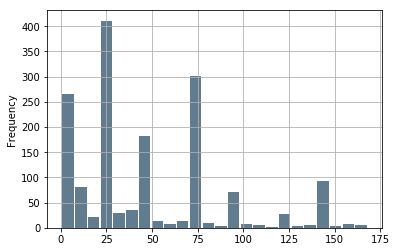

In [78]:
projectDetailsUnq["hours"].plot.hist(grid=True, bins=24, rwidth=0.9,
                   color='#607c8e')

### How many observations are recorded per bioblitz?

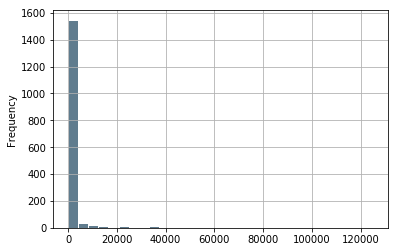

In [79]:
projectDetailsUnq["observations"].plot.hist(grid=True, bins=30, rwidth=0.9,
                   color='#607c8e')

### How many observers per bioblitz?

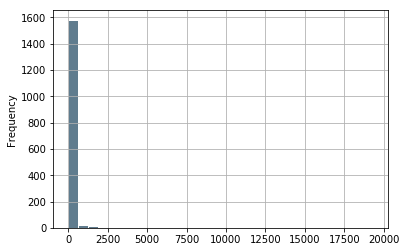

In [80]:
projectDetailsUnq["observers"].plot.hist(grid=True, bins=30, rwidth=0.9,
                   color='#607c8e')

### How many species are recorded per bioblitz?

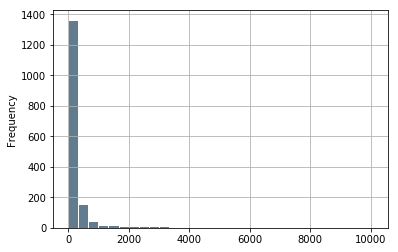

In [81]:
projectDetailsUnq["species"].plot.hist(grid=True, bins=30, rwidth=0.9,
                   color='#607c8e')

### How many identifers work on a bioblitz?

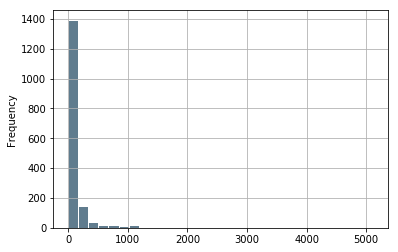

In [82]:
projectDetailsUnq["identifiers"].plot.hist(grid=True, bins=30, rwidth=0.9,
                   color='#607c8e')

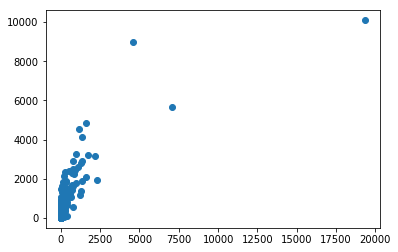

In [83]:
plt.scatter(projectDetailsUnq["observers"],projectDetailsUnq["species"])

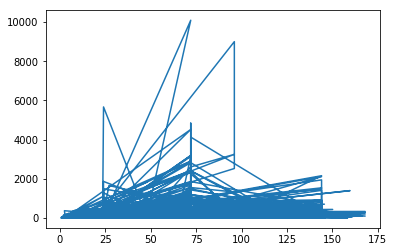

In [84]:
plt.plot(projectDetailsUnq["hours"],projectDetailsUnq["species"])